<a href="https://colab.research.google.com/github/Francisroyce/Francisroyce/blob/main/Malaria_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Data Preparation

# Data Loading

In [4]:
dataset, dataset_info = tfds.load('malaria', with_info=True,
                                  as_supervised=True,
                                  shuffle_files=True,
                                  split=['train'])

In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpoj6n4r07tfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [ ]:
# Specify the dataset name
dataset_name = 'malaria'

# Get the dataset info
dataset_info = tfds.builder(dataset_name).info

# Print the dataset location
print(f"Dataset {dataset_name} is located at: {dataset_info.data_dir}")


Dataset malaria is located at: /root/tensorflow_datasets/malaria/1.0.0


In [ ]:
for data in dataset:
  print(data)
  break

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:
for data in dataset[0].take(4):
  print(data)


(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(106, 121, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

# creating train val test sets

In [3]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
DATA_SIZE = len(dataset)
print(DATA_SIZE)

train_dataset =dataset.take(int(TRAIN_RATIO*DATA_SIZE))
print(list(train_dataset.as_numpy_iterator()))

val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATA_SIZE))
print(list(val_test_dataset.as_numpy_iterator()))

val_dataset = val_test_dataset.take(int(VAL_RATIO*DATA_SIZE))
print(list(val_dataset.as_numpy_iterator()))

test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATA_SIZE))
print(list(test_dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10
[0, 1, 2, 3, 4, 5, 6, 7]
[8, 9]
[8]
[9]


In [5]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    DATA_SIZE = len(dataset)
    train_dataset =dataset.take(int(TRAIN_RATIO*DATA_SIZE))
    val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATA_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATA_SIZE))
    test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATA_SIZE))
    return train_dataset, val_dataset, test_dataset


In [6]:
# dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))


[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

# Dataset Visualization

In [ ]:
# for i, (image, label) in enumerate(train_dataset.take(16)):
#   ax = plt.subplot(4, 4, i + 1)
#   plt.imshow(image)
#   plt.title(dataset_info.features['label'].int2str(label))

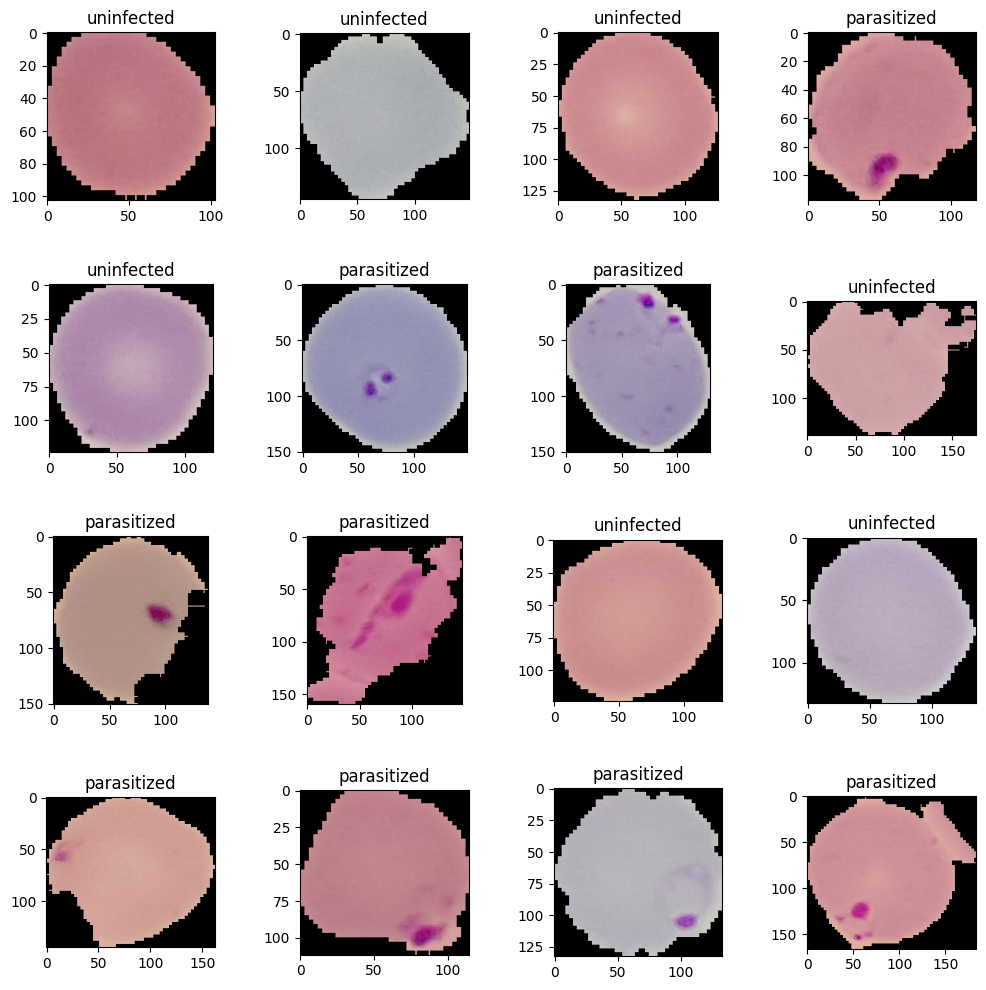

In [ ]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the grid
rows, cols = 4, 4

# Create a figure and adjust the spacing between subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate through the dataset
for i, (image, label) in enumerate(train_dataset.take(16)):
    row, col = i // cols, i % cols
    ax = axes[row, col]

    # Display the image
    ax.imshow(image)

    # Set the title to the label
    ax.set_title(dataset_info.features['label'].int2str(label))

# Hide any empty subplots (if the number of images is less than 16)
for i in range(len(train_dataset), rows * cols):
    row, col = i // cols, i % cols
    axes[row, col].axis('off')

plt.show()


In [ ]:
# checking the labels that has 0 and 1
dataset_info.features['label'].int2str(0)

# we can see (0) is paratized

'parasitized'

In [ ]:
dataset_info.features['label'].int2str(1)

'uninfected'

In [ ]:
# we can see that (1) is uninfected

# Data Processing

In [7]:
# resizing our images
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [8]:
# TRAIN
train_dataset = train_dataset.map(resize_rescale)

# VAL
val_dataset = val_dataset.map(resize_rescale)

# TEST
test_dataset = test_dataset.map(resize_rescale)

print(train_dataset)
print(val_dataset)
print(test_dataset)

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [9]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


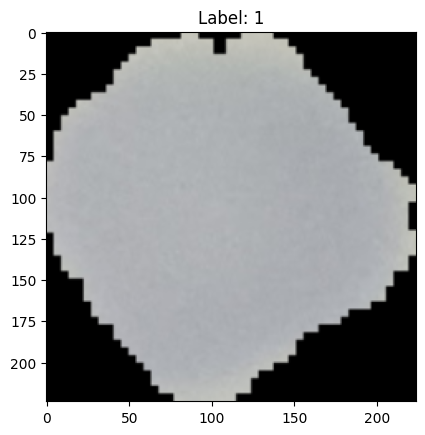

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the dataset and take one batch (image and label)
for image, label in train_dataset.take(1):
    # Ensure the image data is in the [0, 1] range
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Check the shape of the image; it should be (height, width, channels)
    if image.shape[-1] == 1:
        # If the image has a single channel, you may need to convert it to RGB
        image = tf.image.grayscale_to_rgb(image)

    plt.imshow(image)
    plt.title(f"Label: {label.numpy()}")
    plt.show();


In [10]:
# we have to shuffle our data
# TRAIN
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# VAL
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


print(train_dataset)
print(val_dataset)



<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


Using ReLU (Rectified Linear Unit) activation in the first convolutional layer of a neural network is a common practice in deep learning for image classification tasks. This initial ReLU layer helps the network learn important low-level features from the input image.

In the code you provided:

```python
model = Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    Conv2D(32, (3, 3), activation='relu'),  # Initial Conv2D layer with ReLU activation
    Conv2D(6, (5, 5), strides=1, padding='valid', activation='sigmoid'),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(16, (5, 5), strides=1, padding='valid', activation='sigmoid'),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(100, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
```

The first `Conv2D` layer with ReLU activation is primarily responsible for capturing and learning low-level image features, such as edges, corners, and simple textures. ReLU is well-suited for this task because it is a non-linear activation function that allows the network to model complex relationships in the data, and it helps the network efficiently learn and propagate gradients during training.

The subsequent layers use the 'sigmoid' activation function. Sigmoid is often used in the final layers of a neural network for binary classification tasks (where the network predicts whether an image belongs to one of two classes) because it maps the network's output to values between 0 and 1, making it suitable for binary classification problems.

In this architecture, the ReLU activation in the first layer helps the network extract relevant features from the input image, while the sigmoid activations in later layers help make the final binary classification decision. This is a common design pattern for CNNs in binary classification tasks and is often effective in practice.

# Model Creation

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

# Define your input image size (IM_SIZE)
IM_SIZE = 224

model = tf.keras.Sequential([
    InputLayer(input_shape = (IM_SIZE, IM_SIZE, 3)),

    Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides = 2),

    Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation = 'relu'),
    BatchNormalization(),

    Dense(10, activation = 'relu'),
    BatchNormalization(),

    Dense(1, activation = 'sigmoid'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_16 (Ba  (None, 222, 222, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 111, 111, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_17 (Ba  (None, 109, 109, 16)      64        
 tchNormalization)                                               
                                                        

This code is using the TensorFlow library to define and create a convolutional neural network (CNN) model for image classification. Let's break down the code step by step:

1. Import necessary modules:
   - `tensorflow.keras.models.Sequential`: This imports the `Sequential` model class, which is used to create a linear stack of layers for building a neural network model.
   - `tensorflow.keras.layers`: This imports various layer types like `InputLayer`, `Dense`, `Conv2D`, `MaxPooling2D`, and `Flatten` that can be used to build the layers of the neural network.

2. Create a Sequential model:
   ```
   model = tf.keras.Sequential([...])
   ```
   It initializes a new sequential neural network model.

3. Define the input layer:
   ```
   InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3))
   ```
   - `InputLayer` is the first layer of the model and specifies the shape of the input data. In this case, it is set to (IM_SIZE, IM_SIZE, 3), which suggests that the model expects color images as input with a shape of IM_SIZE x IM_SIZE pixels and 3 color channels (R, G, B).

4. Define convolutional and max-pooling layers:
   The code defines two sets of convolutional and max-pooling layers:
   - The first set:
     - `Conv2D` layer with 6 filters, a kernel size of 5x5, "valid" padding, and the "sigmoid" activation function.
     - `MaxPooling2D` layer with a 2x2 pool size and 2x2 strides.
   - The second set:
     - Another `Conv2D` layer with 16 filters, a kernel size of 5x5, "valid" padding, and the "sigmoid" activation function.
     - Another `MaxPooling2D` layer with a 2x2 pool size and 2x2 strides.

5. Flatten layer:
   ```
   Flatten()
   ```
   This layer is used to flatten the output from the convolutional and pooling layers into a one-dimensional array. This is necessary because the subsequent layers are fully connected, and they expect 1D input.

6. Define fully connected (Dense) layers:
   - Three Dense layers are defined with 100 units each and "sigmoid" activation function.
   - The last Dense layer has 2 units, which suggests that the network is designed for binary classification (e.g., classifying images into one of two categories).

7. Model summary:
   ```
   model.summary()
   ```
   This line of code is used to print a summary of the model's architecture, including the layer types, output shapes, and the number of parameters in each layer.

Please note that there are a few issues in the code related to the import statements and layer definitions:
- The import statements should use "tensorflow.keras" instead of just "tf.keras".
- The activation functions should be specified using the "activation" parameter, but in the code, "activations" is used instead.

You can fix the import statements by changing `tf.keras` to `tensorflow.keras`, and update the activation functions to use the "activation" parameter, and the code should work as intended.

# Error sanctioning
 Binary Crossentropy

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics = 'accuracy')


# Training our model

In [ ]:
from tensorflow.keras.callbacks import Callback
import time

class TimeHistory(Callback):
    def on_train_begin(self, logs=None):
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        epoch_time = time.time() - self.epoch_start_time
        self.times.append(epoch_time)
        print(f"Epoch {epoch + 1} took {epoch_time:.2f} seconds")

        # Print the validation loss if available in the logs
        if logs and 'val_loss' in logs:
            print(f"Validation Loss: {logs['val_loss']:.4f}")

# Create an instance of the TimeHistory callback
time_callback = TimeHistory()

# Attach only the time_callback to the model.fit() method (without early stopping)
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1, callbacks=[time_callback])


Epoch 1/20
689/689 [==============================] - ETA: 0s - loss: 0.2973 - accuracy: 0.8797Epoch 1 took 58.03 seconds
Validation Loss: 0.4655
689/689 [==============================] - 58s 64ms/step - loss: 0.2973 - accuracy: 0.8797 - val_loss: 0.4655 - val_accuracy: 0.6911
Epoch 2/20
689/689 [==============================] - ETA: 0s - loss: 0.1946 - accuracy: 0.9367Epoch 2 took 50.55 seconds
Validation Loss: 1.6101
689/689 [==============================] - 51s 73ms/step - loss: 0.1946 - accuracy: 0.9367 - val_loss: 1.6101 - val_accuracy: 0.6461
Epoch 3/20
689/689 [==============================] - ETA: 0s - loss: 0.1776 - accuracy: 0.9410Epoch 3 took 49.60 seconds
Validation Loss: 0.3372
689/689 [==============================] - 50s 72ms/step - loss: 0.1776 - accuracy: 0.9410 - val_loss: 0.3372 - val_accuracy: 0.8377
Epoch 4/20
689/689 [==============================] - ETA: 0s - loss: 0.1649 - accuracy: 0.9451Epoch 4 took 41.80 seconds
Validation Loss: 1.1919
689/689 [========

In [ ]:
history.history

{'loss': [0.29731494188308716,
  0.19464632868766785,
  0.17761367559432983,
  0.1648561805486679,
  0.171378955245018,
  0.15139076113700867,
  0.14341506361961365,
  0.16263501346111298,
  0.139664426445961,
  0.12986454367637634,
  0.1253449022769928,
  0.12459920346736908,
  0.11761580407619476,
  0.11158856749534607,
  0.1185716986656189,
  0.11911025643348694,
  0.10984315723180771,
  0.10280747711658478,
  0.10208641737699509,
  0.09903071820735931],
 'accuracy': [0.8796607255935669,
  0.936677873134613,
  0.9409870505332947,
  0.9450693726539612,
  0.9438446760177612,
  0.949469268321991,
  0.9524176716804504,
  0.9458858966827393,
  0.954050600528717,
  0.9569990038871765,
  0.9573618769645691,
  0.959221601486206,
  0.9611721038818359,
  0.9634854197502136,
  0.9604009985923767,
  0.961852490901947,
  0.9650730490684509,
  0.9666606187820435,
  0.9668420553207397,
  0.9677945971488953],
 'val_loss': [0.46545737981796265,
  1.6101468801498413,
  0.33716973662376404,
  1.191909

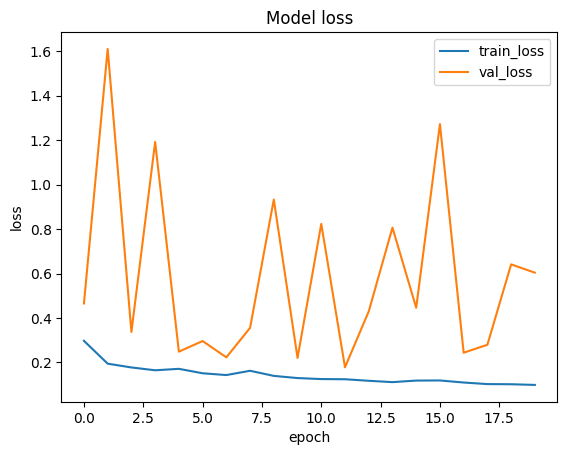

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])  # Provide labels as a list
plt.show()


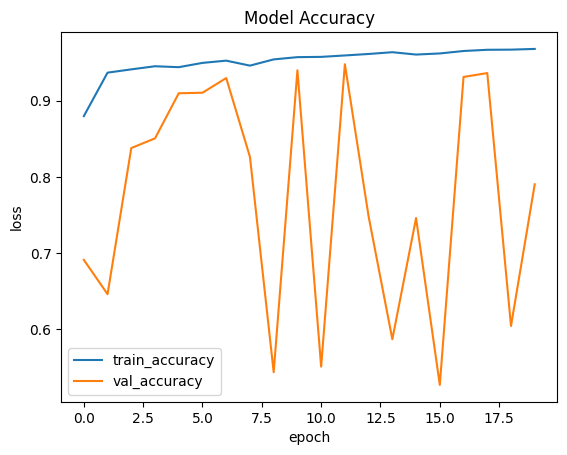

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])  # Provide labels as a list
plt.show()


In [ ]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
test_dataset = test_dataset.batch(1)

In [ ]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Model Evaluation and test


In [ ]:
model.evaluate(test_dataset)

2757/2757 [==============================] - 21s 4ms/step - loss: 0.4125 - accuracy: 0.7900


[0.41250714659690857, 0.7899891138076782]

# Model Prediction

In [ ]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 9s 9s/step


0.00043267765

In [ ]:
# defining if parasitic or not

def parasite_or_not(x):
  if(x<0.5):
    return str('p')
  else:
    return str('u')


In [ ]:
parasite_or_not(model.predict(test_dataset.take(1))[0][0])

1/1 [==============================] - 10s 10s/step


'p'

1/1 [==============================] - 0s 23ms/step


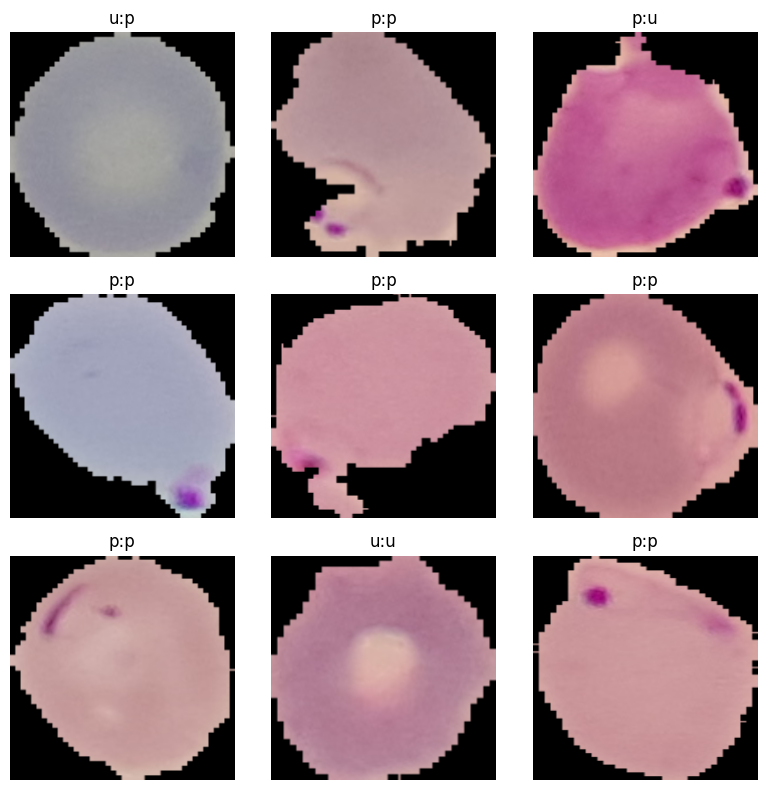

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for (image, label), ax in zip(test_dataset.take(9), axes.flatten()):
    ax.imshow(image[0])
    true_label = parasite_or_not(label.numpy()[0])
    pred_label = parasite_or_not(model.predict(image)[0][0])
    ax.set_title(f"{true_label}:{pred_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Saving  to and Loading from Google drive

In [ ]:
from keras.models import load_model

# Save the model in a specific location
model.save('/content/drive/MyDrive/Mamodel/model.keras')


In [ ]:
from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
!cp -r /content/mamodel/ /content/drive/MyDrive/Mamodel/


In [ ]:
!cp -r /content/drive/MyDrive/Mamodel/ /content/model_colab/


# three ways models are built in tensorflow

1- sequential

2- functional

3- subclassing

we have aalready use the sequential api


# Functional API

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization


In [18]:
# building model extractor

func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name = 'Input Image')

x = Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu')(func_input)
x = BatchNormalization()(x)
x = MaxPool2D (pool_size = 2, strides = 2)(x)
x = Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu')(x)
x = BatchNormalization()(x)
output = MaxPool2D (pool_size = 2, strides = 2)(x)


feature_extractor_model = Model(func_input, output, name = 'Feature_Extractor')

feature_extractor_model.summary()

Model: "Feature_Extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_14 (Ba  (None, 222, 222, 6)       24        
 tchNormalization)                                               
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_15 (Ba  (None, 109, 109, 16)

In [20]:
func_input = Input(shape = (IM_SIZE, IM_SIZE, 3), name = 'Input Image')

x = feature_extractor_model(func_input)

x = Flatten()(x)

x = Dense(100, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation = 'relu')(x)
x = BatchNormalization()(x)
func_output = Dense(1, activation = 'sigmoid')(x)

model_func = Model(func_input, func_output, name = 'model_f')

model_func.summary()

Model: "model_f"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Image (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Feature_Extractor (Functio  (None, 54, 54, 16)        1136      
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 46656)             0         
                                                                 
 dense_12 (Dense)            (None, 100)               4665700   
                                                                 
 batch_normalization_20 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_13 (Dense)            (None, 10)                1010

In [14]:
# compiling our model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

model_func.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics = 'accuracy')

In [ ]:
# Training our model
history = model_func.fit(train_dataset, validation_data=val_dataset, epochs=20, verbose=1, callbacks=[time_callback])


Epoch 1/20
688/689 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.8657Epoch 1 took 59.50 seconds
Validation Loss: 1.2284
689/689 [==============================] - 60s 82ms/step - loss: 0.3326 - accuracy: 0.8658 - val_loss: 1.2284 - val_accuracy: 0.8348
Epoch 2/20
366/689 [==============>...............] - ETA: 14s - loss: 0.2269 - accuracy: 0.9216